In [ ]:
!pip install rpy2==3.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314937 sha256=5aca51630dfd1426ec61fb42f44be623c36c6086e5f3f5901f815d3e2cdb56b4
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.4.2
    Uninstalling rpy2-3.4.2:
      Successfully uninstalled rpy2-3.4.2


In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.8 

In [ ]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import tree

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta_archivo = '/content/drive/MyDrive/TFM/datos_100_por_ciento.csv'
datos_100_por_ciento = pd.read_csv(ruta_archivo)

In [ ]:
for etiqueta in [0,1,2,3]:
  if etiqueta == 0:
    df_ = datos_100_por_ciento[datos_100_por_ciento['labels'] == 0]

    # Seleccionar 42,386 filas al azar de las filas filtradas
    df_balanceado = df_.sample(n=42386, random_state=42)
  else:
    df_ = datos_100_por_ciento[datos_100_por_ciento['labels'] == etiqueta]

    df_etiqueta = df_.sample(n=42386, random_state=42)
    df_balanceado = pd.concat([df_balanceado, df_etiqueta], axis=0)

df_balanceado.reset_index(drop=True, inplace=True)

In [ ]:
df_balanceado

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,valence,labels
0,0.477,0.7450,0.48100,0.825000,-11.190,0.0451,0.3320,0
1,0.571,0.7180,0.50300,0.124000,-9.555,0.0427,0.3320,0
2,0.543,0.5360,0.47500,0.000000,-6.154,0.0287,0.2990,0
3,0.144,0.4980,0.81200,0.317000,-7.686,0.0322,0.1110,0
4,0.394,0.4570,0.55300,0.000187,-7.708,0.0323,0.4530,0
...,...,...,...,...,...,...,...,...
169539,0.990,0.5350,0.06840,0.773000,-60.000,0.0384,0.4640,3
169540,0.892,0.0757,0.07280,0.872000,-23.017,0.0450,0.0325,3
169541,0.676,0.6350,0.30700,0.904000,-16.255,0.0446,0.4080,3
169542,0.906,0.6330,0.09230,0.913000,-22.391,0.0375,0.0473,3


In [ ]:
def particion(data_, frac):
  datos_por_ciento = data_.sample(frac=frac*0.01, random_state=42)

  return datos_por_ciento

In [ ]:
datos_20_por_ciento = particion(df_balanceado, 20)
datos_50_por_ciento = particion(df_balanceado, 50)
datos_70_por_ciento = particion(df_balanceado, 70)
datos_100_por_ciento = df_balanceado

In [ ]:
x_train20,x_test20,y_train20,y_test20 = train_test_split(datos_20_por_ciento.drop(columns = ['labels'] , axis = 1) , datos_20_por_ciento['labels'] , test_size = 0.3, random_state=10)
x_train50,x_test50,y_train50,y_test50 = train_test_split(datos_50_por_ciento.drop(columns = ['labels'] , axis = 1) , datos_50_por_ciento['labels'] , test_size = 0.3, random_state=10)
x_train70,x_test70,y_train70,y_test70 = train_test_split(datos_70_por_ciento.drop(columns = ['labels'] , axis = 1) , datos_70_por_ciento['labels'] , test_size = 0.3, random_state=10)
x_train100,x_test100,y_train100,y_test100 = train_test_split(datos_100_por_ciento.drop(columns = ['labels'] , axis = 1) , datos_100_por_ciento['labels'] , test_size = 0.3, random_state=10)

In [ ]:
from sklearn import preprocessing
def normalizar(x_train, x_test):
  scaler_all_primero = preprocessing.StandardScaler().fit(x_train)
  X_train_norm = scaler_all_primero.transform(x_train)
  X_test_norm = scaler_all_primero.transform(x_test)
  return X_train_norm, X_test_norm

In [ ]:
x_train_norm20, x_test_norm20 = normalizar(x_train20, x_test20)
x_train_norm50, x_test_norm50 = normalizar(x_train50, x_test50)
x_train_norm70, x_test_norm70 = normalizar(x_train70, x_test70)
x_train_norm100, x_test_norm100 = normalizar(x_train100, x_test100)

In [ ]:
def perf_measure(y_actual, y_pred):
    class_id = set(y_actual).union(set(y_pred))
    TP = []
    FP = []
    TN = []
    FN = []

    for index ,_id in enumerate(class_id):
        TP.append(0)
        FP.append(0)
        TN.append(0)
        FN.append(0)
        for i in range(len(y_pred)):
            if y_actual.iloc[i] == y_pred[i] == _id:
                TP[index] += 1
            if y_pred[i] == _id and y_actual.iloc[i] != y_pred[i]:
                FP[index] += 1
            if y_actual.iloc[i] != _id and y_pred[i] != _id:
                TN[index] += 1
            if y_pred[i] != _id and y_actual.iloc[i] == _id:
                FN[index] += 1


    return class_id,TP, FP, TN, FN


In [ ]:
def especificidadd(TN,FP):
  espe = [TN[i]/(TN[i] + FP[i]) for i in range(len(TN))]
  print(espe)
  print((espe[0] + espe[1] + espe[2] + espe[3])/4)
  return espe, (espe[0] + espe[1] + espe[2] + espe[3])/4

In [ ]:
def sensibilidad(TP, FN):
  sens=[]
  for i in range(len(TP)):
      if (TP[i]+FN[i]) == 0:
          sens.append(0)
      else:
          se = TP[i]/(TP[i]+FN[i])
          sens.append(se)
  avg_s = (sens[0] + sens[1] + sens[2] + sens[3])/4
  print(sens)
  print(avg_s)
  return sens, avg_s

In [ ]:
def aciertos(TP, TN, FP, FN):
  ac = [(TP[i]+TN[i])/(TP[i]+TN[i]+FP[i]+FN[i]) for i in range(len(TN))]
  print(ac)
  print((ac[0] + ac[1] + ac[2] + ac[3])/4)
  return ac, (ac[0] + ac[1] + ac[2] + ac[3])/4

In [ ]:
import psutil
import time
def memory_usage():
    process = psutil.Process()
    mem_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
    return mem_usage

## SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def SVM_(datos, frac):
  param_grid = {
      'kernel': ['linear', 'rbf']
  }
  x_train,x_test,y_train,y_test = train_test_split(datos.drop(columns = ['labels'] , axis = 1) , datos['labels'] , test_size = frac, random_state=10)
  x_train_norm, x_test_norm = normalizar(x_train, x_test)
  svm_model = SVC(random_state=42)
  grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')

  grid_search.fit(x_train_norm, y_train)

  print("Mejores parámetros encontrados:", grid_search.best_params_)
  print("Mejor puntuación de validación cruzada:", grid_search.best_score_)

  best_model = grid_search.best_estimator_
  y_pred = best_model.predict(x_test_norm)
  print('Accuracy', accuracy_score(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  class_id, TP, FP, TN, FN = perf_measure(y_test, y_pred)
  print(f'TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}')
  print('Especificidad')
  espe = especificidadd(TN,FP)
  print('Sensibilidad')
  sens = sensibilidad(TP, FN)
  print('Aciertos')
  ac = aciertos(TP, TN, FP, FN)
  return y_pred

In [ ]:
y_pred_SVM100 = SVM_(datos_100_por_ciento, 0.3)

Mejores parámetros encontrados: {'kernel': 'rbf'}
Mejor puntuación de validación cruzada: 0.8786990225817324
Accuracy 0.877988361119849
[[10663   976   388   631]
 [  884 10368  1444    80]
 [  163  1311 11301    18]
 [  241    59    11 12326]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87     12658
           1       0.82      0.81      0.81     12776
           2       0.86      0.88      0.87     12793
           3       0.94      0.98      0.96     12637

    accuracy                           0.88     50864
   macro avg       0.88      0.88      0.88     50864
weighted avg       0.88      0.88      0.88     50864

TP: [10663, 10368, 11301, 12326], FP: [1288, 2346, 1843, 729], TN: [36918, 35742, 36228, 37498], FN: [1995, 2408, 1492, 311]
Especificidad
[0.9662880175888604, 0.9384057971014492, 0.9515904494234456, 0.9809297093677244]
0.9593034933703699
Sensibilidad
[0.842392163058935, 0.8115216030056356, 0.8833737200031268, 0.975389

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def SVM_h(datos, frac):

  x_train,x_test,y_train,y_test = train_test_split(datos.drop(columns = ['labels'] , axis = 1) , datos['labels'] , test_size = frac, random_state=10)
  x_train_norm, x_test_norm = normalizar(x_train, x_test)

  # Descartar el primer valor de uso de CPU para evitar mediciones incorrectas
  psutil.cpu_percent(interval=None)

  # Monitoreo de recursos antes del ajuste
  start_ram_fit = memory_usage()
  start_cpu_fit = psutil.cpu_percent(interval=1)
  start_time_fit = time.time()

  svm_model = SVC(kernel = 'rbf', random_state=42)

  svm_model.fit(x_train_norm, y_train)

  # Monitoreo de recursos después del ajuste
  end_ram_fit = memory_usage()
  end_cpu_fit = psutil.cpu_percent(interval=1)
  end_time_fit = time.time()

  # Cálculo del uso de recursos durante el ajuste
  ram_used_fit = end_ram_fit - start_ram_fit
  cpu_used_fit = end_cpu_fit - start_cpu_fit
  time_used_fit = end_time_fit - start_time_fit

  print(f'RAM usada durante fit: {ram_used_fit:.2f} MB')
  print(f'CPU usada durante fit: {cpu_used_fit:.2f}%')
  print(f'Tiempo de ejecución durante fit: {time_used_fit:.2f} segundos')

  # Monitoreo de recursos antes de la predicción
  start_ram_predict = memory_usage()
  start_cpu_predict = psutil.cpu_percent(interval=1)
  start_time_predict = time.time()

  y_pred = svm_model.predict(x_test_norm)
  print('Accuracy', accuracy_score(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  class_id, TP, FP, TN, FN = perf_measure(y_test, y_pred)
  print(f'TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}')
  print('Especificidad')
  espe = especificidadd(TN,FP)
  print('Sensibilidad')
  sens = sensibilidad(TP, FN)
  print('Aciertos')
  ac = aciertos(TP, TN, FP, FN)

  # Monitoreo de recursos después de la predicción
  end_ram_predict = memory_usage()
  end_cpu_predict = psutil.cpu_percent(interval=1)
  end_time_predict = time.time()

  # Cálculo del uso de recursos durante la predicción
  ram_used_predict = end_ram_predict - start_ram_predict
  cpu_used_predict = end_cpu_predict - start_cpu_predict
  time_used_predict = end_time_predict - start_time_predict

  print(f'RAM usada durante predict: {ram_used_predict:.2f} MB')
  print(f'CPU usada durante predict: {cpu_used_predict:.2f}%')
  print(f'Tiempo de ejecución durante predict: {time_used_predict:.2f} segundos')

  return y_pred

##Árbol de decisión

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

def tree(datos, frac):

  # Definir el clasificador de árbol de decisión
  dt_classifier = DecisionTreeClassifier()
  x_train,x_test,y_train,y_test = train_test_split(datos.drop(columns = ['labels'] , axis = 1) , datos['labels'] , test_size = frac, random_state=10)

  # Definir los parámetros que deseas buscar
  parameters = {
      'criterion': ['gini','entropy'],
      'max_depth': np.arange(2, 11),
      'min_samples_leaf': [50, 100, 150, 200],
      'min_samples_split': [5, 10, 25, 50, 100, 150, 200]
  }

  # Crear el objeto GridSearchCV
  cv_object = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

  grid_search = GridSearchCV(estimator=dt_classifier, param_grid=parameters, scoring='accuracy', cv=cv_object)

  # Ajustar el modelo
  grid_search.fit(x_train, y_train)

  # Mostrar los mejores parámetros encontrados
  print("Mejores parámetros encontrados:", grid_search.best_params_)

  # Predecir con el mejor modelo encontrado
  best_model = grid_search.best_estimator_
  y_pred = best_model.predict(x_test)

  # Calcular la precisión en el conjunto de prueba
  accuracy = accuracy_score(y_test, y_pred)
  print('- Accuracy:', accuracy)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred, zero_division=1))
  class_id, TP, FP, TN, FN = perf_measure(y_test, y_pred)
  print(f'TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}')
  print('Especificidad')
  espe = especificidadd(TN,FP)
  print('Sensibilidad')
  sens = sensibilidad(TP, FN)
  print('Aciertos')
  ac= aciertos(TP, TN, FP, FN)
  return y_pred


In [ ]:
tree(datos_100_por_ciento, 0.3)

Mejores parámetros encontrados: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 5}
- Accuracy: 0.8947782321484744
[[10972   834   313   539]
 [  857 10612  1224    83]
 [  198   952 11628    15]
 [  229    89    19 12300]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88     12658
           1       0.85      0.83      0.84     12776
           2       0.88      0.91      0.90     12793
           3       0.95      0.97      0.96     12637

    accuracy                           0.89     50864
   macro avg       0.89      0.89      0.89     50864
weighted avg       0.89      0.89      0.89     50864

TP: [10972, 10612, 11628, 12300], FP: [1284, 1875, 1556, 637], TN: [36922, 36213, 36515, 37590], FN: [1686, 2164, 1165, 337]
Especificidad
[0.9663927131864105, 0.9507718966603654, 0.9591289958235928, 0.9833363852774217]
0.9649074977369476
Sensibilidad
[0.8668036024648443, 0.8306199123356293, 0.90893457

array([2, 2, 2, ..., 2, 1, 2])

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

def tree_h(datos, hyperparameters, frac):

  x_train,x_test,y_train,y_test = train_test_split(datos.drop(columns = ['labels'] , axis = 1) , datos['labels'] , test_size = frac, random_state=10)

  # Descartar el primer valor de uso de CPU para evitar mediciones incorrectas
  psutil.cpu_percent(interval=None)

  # Monitoreo de recursos antes del ajuste
  start_ram_fit = memory_usage()
  start_cpu_fit = psutil.cpu_percent(interval=1)
  start_time_fit = time.time()


  dt_classifier = DecisionTreeClassifier(
    criterion=hyperparameters['criterion'],
    max_depth=hyperparameters['max_depth'],
    min_samples_leaf=hyperparameters['min_samples_leaf'],
    min_samples_split=hyperparameters['min_samples_split']
)

  # Ajustar el modelo
  my_tree =dt_classifier.fit(x_train, y_train)


  # Monitoreo de recursos después del ajuste
  end_ram_fit = memory_usage()
  end_cpu_fit = psutil.cpu_percent(interval=1)
  end_time_fit = time.time()

  # Cálculo del uso de recursos durante el ajuste
  ram_used_fit = end_ram_fit - start_ram_fit
  cpu_used_fit = end_cpu_fit - start_cpu_fit
  time_used_fit = end_time_fit - start_time_fit

  print(f'RAM usada durante fit: {ram_used_fit:.2f} MB')
  print(f'CPU usada durante fit: {cpu_used_fit:.2f}%')
  print(f'Tiempo de ejecución durante fit: {time_used_fit:.2f} segundos')

  # Monitoreo de recursos antes de la predicción
  start_ram_predict = memory_usage()
  start_cpu_predict = psutil.cpu_percent(interval=1)
  start_time_predict = time.time()

  y_pred = dt_classifier.predict(x_test)

  # Monitoreo de recursos después de la predicción
  end_ram_predict = memory_usage()
  end_cpu_predict = psutil.cpu_percent(interval=1)
  end_time_predict = time.time()

  # Cálculo del uso de recursos durante la predicción
  ram_used_predict = end_ram_predict - start_ram_predict
  cpu_used_predict = end_cpu_predict - start_cpu_predict
  time_used_predict = end_time_predict - start_time_predict

  print(f'RAM usada durante predict: {ram_used_predict:.2f} MB')
  print(f'CPU usada durante predict: {cpu_used_predict:.2f}%')
  print(f'Tiempo de ejecución durante predict: {time_used_predict:.2f} segundos')

  # Calcular la precisión en el conjunto de prueba
  accuracy = accuracy_score(y_test, y_pred)
  print('- Accuracy:', accuracy)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred, zero_division=1))
  class_id, TP, FP, TN, FN = perf_measure(y_test, y_pred)
  print(f'TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}')
  print('Especificidad')
  espe = especificidadd(TN,FP)
  print('Sensibilidad')
  sens = sensibilidad(TP, FN)
  print('Aciertos')
  ac= aciertos(TP, TN, FP, FN)

  return my_tree, y_pred


In [ ]:
hiperparametros_tree100 = {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 5}

In [ ]:
my_tree, y_pred_tree100 = tree_h(datos_100_por_ciento, hiperparametros_tree100, 0.3)

RAM usada durante fit: 1.80 MB
CPU usada durante fit: 3.30%
Tiempo de ejecución durante fit: 1.84 segundos
RAM usada durante predict: 0.00 MB
CPU usada durante predict: -1.40%
Tiempo de ejecución durante predict: 1.01 segundos
- Accuracy: 0.8947782321484744
[[10972   834   313   539]
 [  857 10612  1224    83]
 [  198   952 11628    15]
 [  229    89    19 12300]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88     12658
           1       0.85      0.83      0.84     12776
           2       0.88      0.91      0.90     12793
           3       0.95      0.97      0.96     12637

    accuracy                           0.89     50864
   macro avg       0.89      0.89      0.89     50864
weighted avg       0.89      0.89      0.89     50864

TP: [10972, 10612, 11628, 12300], FP: [1284, 1875, 1556, 637], TN: [36922, 36213, 36515, 37590], FN: [1686, 2164, 1165, 337]
Especificidad
[0.9663927131864105, 0.9507718966603654, 0.9591289958235928

In [ ]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
import pydotplus

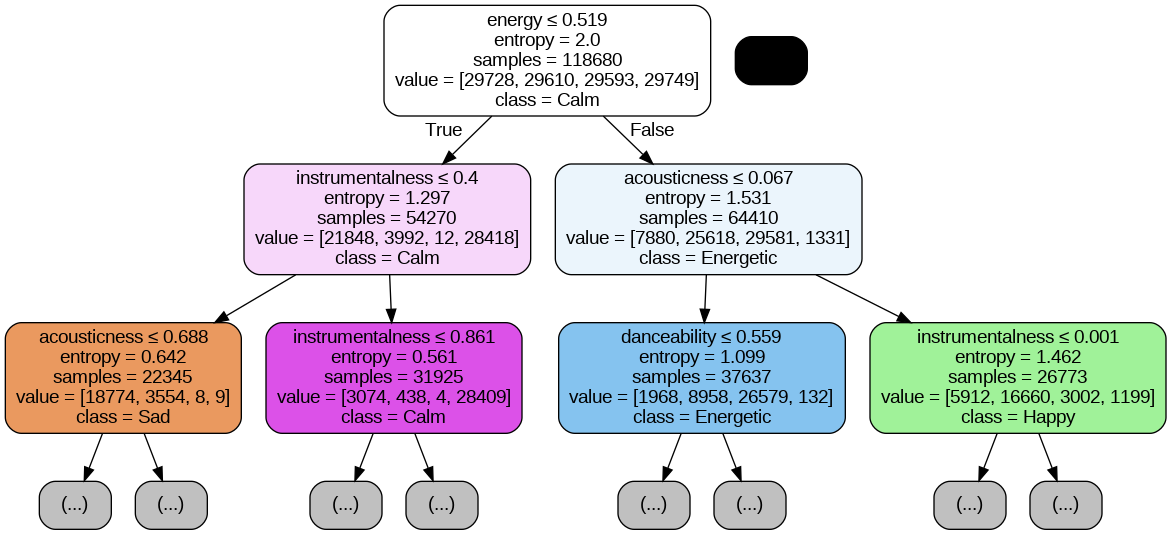

In [ ]:
# Limitar la profundidad del árbol que se visualiza a 3 niveles, por ejemplo
dot_data = StringIO()
export_graphviz(my_tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=x_train100.columns,
                class_names=['Sad', 'Happy', 'Energetic', 'Calm'], max_depth=2)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_limited.png')
Image(graph.create_png())

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
def KNN(datos, frac):

    k_values = range(1,100,10)
    x_train,x_test,y_train,y_test = train_test_split(datos.drop(columns = ['labels'] , axis = 1) , datos['labels'] , test_size = frac, random_state=10)
    x_train_norm, x_test_norm = normalizar(x_train, x_test)

    # GridSearchCV
    param_grid = {'n_neighbors': k_values}
    # k-NN
    kNN_model=KNeighborsClassifier()

    #usamos Gridsearch para Xtest
    grid_norm = GridSearchCV(kNN_model, param_grid, cv = 5, scoring = 'accuracy')
    grid_norm.fit(x_train_norm,y_train)
    print(grid_norm.best_params_)

    #Generamos el modelo
    my_model_kNN_norm = grid_norm.best_estimator_

    my_model_kNN_norm.fit(x_train_norm, y_train)
    y_predicted_kNN_norm = my_model_kNN_norm.predict(x_test_norm)

    accuracy_kNN_norm = accuracy_score(y_test, y_predicted_kNN_norm)

    print('Accuracy:', accuracy_kNN_norm)
    print(confusion_matrix(y_test, y_predicted_kNN_norm))
    print(classification_report(y_test, y_predicted_kNN_norm))

    return accuracy_kNN_norm, y_predicted_kNN_norm

In [ ]:
KNN(datos_100_por_ciento, 0.3)

{'n_neighbors': 21}
Accuracy: 0.8664084617804341
[[10302  1147   458   751]
 [  926 10296  1483    71]
 [  228  1421 11120    24]
 [  203    66    17 12351]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.85     12658
           1       0.80      0.81      0.80     12776
           2       0.85      0.87      0.86     12793
           3       0.94      0.98      0.96     12637

    accuracy                           0.87     50864
   macro avg       0.87      0.87      0.87     50864
weighted avg       0.87      0.87      0.87     50864



(0.8664084617804341, array([2, 2, 2, ..., 2, 1, 2]))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def KNN_h(datos, frac, k):

    x_train,x_test,y_train,y_test = train_test_split(datos.drop(columns = ['labels'] , axis = 1) , datos['labels'] , test_size = frac, random_state=10)
    x_train_norm, x_test_norm = normalizar(x_train, x_test)

    psutil.cpu_percent(interval=None)

    # Monitoreo de recursos antes del ajuste
    start_ram_fit = memory_usage()
    start_cpu_fit = psutil.cpu_percent(interval=1)
    start_time_fit = time.time()

    # k-NN
    kNN_model=KNeighborsClassifier(n_neighbors=k)

    kNN_model.fit(x_train_norm,y_train)

    # Monitoreo de recursos después del ajuste
    end_ram_fit = memory_usage()
    end_cpu_fit = psutil.cpu_percent(interval=1)
    end_time_fit = time.time()

    # Cálculo del uso de recursos durante el ajuste
    ram_used_fit = end_ram_fit - start_ram_fit
    cpu_used_fit = end_cpu_fit - start_cpu_fit
    time_used_fit = end_time_fit - start_time_fit

    print(f'RAM usada durante fit: {ram_used_fit:.2f} MB')
    print(f'CPU usada durante fit: {cpu_used_fit:.2f}%')
    print(f'Tiempo de ejecución durante fit: {time_used_fit:.2f} segundos')

    # Monitoreo de recursos antes de la predicción
    start_ram_predict = memory_usage()
    start_cpu_predict = psutil.cpu_percent(interval=1)
    start_time_predict = time.time()

    y_predicted_kNN_norm = kNN_model.predict(x_test_norm)

    # Monitoreo de recursos después de la predicción
    end_ram_predict = memory_usage()
    end_cpu_predict = psutil.cpu_percent(interval=1)
    end_time_predict = time.time()

    # Cálculo del uso de recursos durante la predicción
    ram_used_predict = end_ram_predict - start_ram_predict
    cpu_used_predict = end_cpu_predict - start_cpu_predict
    time_used_predict = end_time_predict - start_time_predict

    print(f'RAM usada durante predict: {ram_used_predict:.2f} MB')
    print(f'CPU usada durante predict: {cpu_used_predict:.2f}%')
    print(f'Tiempo de ejecución durante predict: {time_used_predict:.2f} segundos')

    accuracy_kNN_norm = accuracy_score(y_test, y_predicted_kNN_norm)

    print('Accuracy:', accuracy_kNN_norm)
    print(confusion_matrix(y_test, y_predicted_kNN_norm))
    print(classification_report(y_test, y_predicted_kNN_norm))
    class_id, TP, FP, TN, FN = perf_measure(y_test, y_predicted_kNN_norm)
    print(f'TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}')
    print('Especificidad')
    espe = especificidadd(TN,FP)
    print('Sensibilidad')
    sens = sensibilidad(TP, FN)
    print('Aciertos')
    ac= aciertos(TP, TN, FP, FN)

    return accuracy_kNN_norm, y_predicted_kNN_norm

In [ ]:
KNN_h(datos_100_por_ciento, 0.3, 21)

RAM usada durante fit: 0.00 MB
CPU usada durante fit: 0.00%
Tiempo de ejecución durante fit: 1.79 segundos
RAM usada durante predict: 11.86 MB
CPU usada durante predict: -71.40%
Tiempo de ejecución durante predict: 15.00 segundos
Accuracy: 0.8664084617804341
[[10302  1147   458   751]
 [  926 10296  1483    71]
 [  228  1421 11120    24]
 [  203    66    17 12351]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.85     12658
           1       0.80      0.81      0.80     12776
           2       0.85      0.87      0.86     12793
           3       0.94      0.98      0.96     12637

    accuracy                           0.87     50864
   macro avg       0.87      0.87      0.87     50864
weighted avg       0.87      0.87      0.87     50864

TP: [10302, 10296, 11120, 12351], FP: [1357, 2634, 1958, 846], TN: [36849, 35454, 36113, 37381], FN: [2356, 2480, 1673, 286]
Especificidad
[0.9644820185311208, 0.9308443604284814, 0.948569777520947

(0.8664084617804341, array([2, 2, 2, ..., 2, 1, 2]))

## Naive Bayes

In [ ]:
import psutil
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def naive_bayes(datos, frac):

    x_train,x_test,y_train,y_test = train_test_split(datos.drop(columns = ['labels'] , axis = 1) , datos['labels'] , test_size = frac, random_state=10)
    # Monitoreo de recursos antes del ajuste
    start_ram_fit = memory_usage()
    start_cpu_fit = psutil.cpu_percent(interval=1)
    start_time_fit = time.time()

    # Calcular las probabilidades a priori
    total_samples = len(y_train)
    class_counts = {c: sum(y_train == c) for c in set(y_train)}
    priors = [class_counts[c] / total_samples for c in sorted(class_counts.keys())]

    # Inicializar el clasificador Naive Bayes Gaussiano con las probabilidades a priori calculadas
    nb_detector = GaussianNB(priors=priors)

    nb_detector.fit(x_train, y_train)

    # Monitoreo de recursos después del ajuste
    end_ram_fit = memory_usage()
    end_cpu_fit = psutil.cpu_percent(interval=1)
    end_time_fit = time.time()

    # Cálculo del uso de recursos durante el ajuste
    ram_used_fit = end_ram_fit - start_ram_fit
    cpu_used_fit = end_cpu_fit - start_cpu_fit
    time_used_fit = end_time_fit - start_time_fit

    print(f'RAM usada durante fit: {ram_used_fit:.2f} MB')
    print(f'CPU usada durante fit: {cpu_used_fit:.2f}%')
    print(f'Tiempo de ejecución durante fit: {time_used_fit:.2f} segundos')

    # Monitoreo de recursos antes de la predicción
    start_ram_predict = memory_usage()
    start_cpu_predict = psutil.cpu_percent(interval=1)
    start_time_predict = time.time()

    y_pred = nb_detector.predict(x_test)

    # Monitoreo de recursos después de la predicción
    end_ram_predict = memory_usage()
    end_cpu_predict = psutil.cpu_percent(interval=1)
    end_time_predict = time.time()

    # Cálculo del uso de recursos durante la predicción
    ram_used_predict = end_ram_predict - start_ram_predict
    cpu_used_predict = end_cpu_predict - start_cpu_predict
    time_used_predict = end_time_predict - start_time_predict

    print(f'RAM usada durante predict: {ram_used_predict:.2f} MB')
    print(f'CPU usada durante predict: {cpu_used_predict:.2f}%')
    print(f'Tiempo de ejecución durante predict: {time_used_predict:.2f} segundos')

    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy:', accuracy)

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    class_id, TP, FP, TN, FN = perf_measure(y_test, y_pred)
    print(f'TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}')
    print('Especificidad')
    espe = especificidadd(TN, FP)
    print('Sensibilidad')
    sens = sensibilidad(TP, FN)
    print('Aciertos')
    ac = aciertos(TP, TN, FP, FN)

    return y_pred


In [ ]:
naive_bayes(datos_100_por_ciento, 0.3)

RAM usada durante fit: 0.00 MB
CPU usada durante fit: -1.00%
Tiempo de ejecución durante fit: 1.09 segundos
RAM usada durante predict: 0.00 MB
CPU usada durante predict: -1.50%
Tiempo de ejecución durante predict: 1.01 segundos
Accuracy: 0.8096492607738283
[[ 9331  1897   777   653]
 [  938  8955  2863    20]
 [  134  1301 11332    26]
 [  900   165     8 11564]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78     12658
           1       0.73      0.70      0.71     12776
           2       0.76      0.89      0.82     12793
           3       0.94      0.92      0.93     12637

    accuracy                           0.81     50864
   macro avg       0.81      0.81      0.81     50864
weighted avg       0.81      0.81      0.81     50864

TP: [9331, 8955, 11332, 11564], FP: [1972, 3363, 3648, 699], TN: [36234, 34725, 34423, 37528], FN: [3327, 3821, 1461, 1073]
Especificidad
[0.9483850704077893, 0.9117044738500315, 0.9041790339103254, 

array([2, 2, 2, ..., 1, 1, 2])

## Random forest

In [ ]:
def random_forest(datos, frac):

    param_grid = {
    'criterion': ['gini','entropy'],
    'bootstrap': [True],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [10, 20, 30],
    'min_samples_split': [5, 10, 20]
    }

    x_train,x_test,y_train,y_test = train_test_split(datos.drop(columns = ['labels'] , axis = 1) , datos['labels'] , test_size = frac, random_state=10)

    drandom_model_op = RandomForestClassifier(max_depth = 7)

    drandom_model_op = GridSearchCV(drandom_model_op, param_grid, cv=3)

    drandom_model_op = drandom_model_op.fit(x_train, y_train)
    print(drandom_model_op.best_params_)

    # Entrenamos el modelo
    my_model_random_op = drandom_model_op.best_estimator_
    my_random_op=my_model_random_op.fit(x_train, y_train)

    y_pred = my_random_op.predict(x_test)

    accuracy_rf = accuracy_score(y_test, y_pred)

    print('Accuracy:', accuracy_rf)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [ ]:
random_forest(datos_100_por_ciento, 0.3)

{'bootstrap': True, 'criterion': 'gini', 'max_features': 2, 'min_samples_leaf': 20, 'min_samples_split': 10}
Accuracy: 0.8962724127083989
[[11016   764   360   518]
 [  870 10638  1184    84]
 [  125  1039 11614    15]
 [  237    53    27 12320]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88     12658
           1       0.85      0.83      0.84     12776
           2       0.88      0.91      0.89     12793
           3       0.95      0.97      0.96     12637

    accuracy                           0.90     50864
   macro avg       0.90      0.90      0.90     50864
weighted avg       0.90      0.90      0.90     50864



In [ ]:
def random_forest_h(datos, hyperparameters, frac):

    x_train,x_test,y_train,y_test = train_test_split(datos.drop(columns = ['labels'] , axis = 1) , datos['labels'] , test_size = frac, random_state=10)

    start_ram_fit = memory_usage()
    start_cpu_fit = psutil.cpu_percent(interval=1)
    start_time_fit = time.time()

    rf_model= RandomForestClassifier(max_depth = 7, bootstrap=hyperparameters['bootstrap'],
    criterion=hyperparameters['criterion'],
    max_features=hyperparameters['max_features'],
    min_samples_leaf=hyperparameters['min_samples_leaf'],
    min_samples_split=hyperparameters['min_samples_split'],
    random_state=42)

    # Entrenamos con los datos de train
    rf_model= rf_model.fit(x_train, y_train)

    # Monitoreo de recursos después del ajuste
    end_ram_fit = memory_usage()
    end_cpu_fit = psutil.cpu_percent(interval=1)
    end_time_fit = time.time()

    # Cálculo del uso de recursos durante el ajuste
    ram_used_fit = end_ram_fit - start_ram_fit
    cpu_used_fit = end_cpu_fit - start_cpu_fit
    time_used_fit = end_time_fit - start_time_fit

    print(f'RAM usada durante fit: {ram_used_fit:.2f} MB')
    print(f'CPU usada durante fit: {cpu_used_fit:.2f}%')
    print(f'Tiempo de ejecución durante fit: {time_used_fit:.2f} segundos')

    # Monitoreo de recursos antes de la predicción
    start_ram_predict = memory_usage()
    start_cpu_predict = psutil.cpu_percent(interval=1)
    start_time_predict = time.time()

    y_pred = rf_model.predict(x_test)

    # Monitoreo de recursos después de la predicción
    end_ram_predict = memory_usage()
    end_cpu_predict = psutil.cpu_percent(interval=1)
    end_time_predict = time.time()

    # Cálculo del uso de recursos durante la predicción
    ram_used_predict = end_ram_predict - start_ram_predict
    cpu_used_predict = end_cpu_predict - start_cpu_predict
    time_used_predict = end_time_predict - start_time_predict

    print(f'RAM usada durante predict: {ram_used_predict:.2f} MB')
    print(f'CPU usada durante predict: {cpu_used_predict:.2f}%')
    print(f'Tiempo de ejecución durante predict: {time_used_predict:.2f} segundos')

    accuracy_rf = accuracy_score(y_test, y_pred)

    print('Accuracy:', accuracy_rf)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    class_id, TP, FP, TN, FN = perf_measure(y_test, y_pred)
    print(f'TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}')
    print('Especificidad')
    espe = especificidadd(TN,FP)
    print('Sensibilidad')
    sens = sensibilidad(TP, FN)
    print('Aciertos')
    ac= aciertos(TP, TN, FP, FN)

    return y_pred

In [ ]:
hiperparametros_rf100 = {'bootstrap': True, 'criterion': 'gini', 'max_features': 2, 'min_samples_leaf': 20, 'min_samples_split': 10}

In [ ]:
random_forest_h(datos_100_por_ciento, hiperparametros_rf100, 0.3)

RAM usada durante fit: 0.00 MB
CPU usada durante fit: -58.50%
Tiempo de ejecución durante fit: 15.91 segundos
RAM usada durante predict: 0.00 MB
CPU usada durante predict: 2.50%
Tiempo de ejecución durante predict: 1.36 segundos
Accuracy: 0.8959775086505191
[[11001   794   359   504]
 [  857 10624  1213    82]
 [  112  1024 11642    15]
 [  257    53    21 12306]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88     12658
           1       0.85      0.83      0.84     12776
           2       0.88      0.91      0.89     12793
           3       0.95      0.97      0.96     12637

    accuracy                           0.90     50864
   macro avg       0.90      0.90      0.90     50864
weighted avg       0.90      0.90      0.90     50864

TP: [11001, 10624, 11642, 12306], FP: [1226, 1871, 1593, 601], TN: [36980, 36217, 36478, 37626], FN: [1657, 2152, 1151, 331]
Especificidad
[0.9679107993508873, 0.9508769166141567, 0.9581571274723543

array([2, 2, 2, ..., 2, 1, 2])

# PyCaret

In [ ]:
def perf_measure(y_actual, y_pred):
    class_id = set(y_actual).union(set(y_pred))
    TP = []
    FP = []
    TN = []
    FN = []

    for index ,_id in enumerate(class_id):
        TP.append(0)
        FP.append(0)
        TN.append(0)
        FN.append(0)
        for i in range(len(y_pred)):
            if y_actual.iloc[i] == y_pred.iloc[i] == _id:
                TP[index] += 1
            if y_pred.iloc[i] == _id and y_actual.iloc[i] != y_pred.iloc[i]:
                FP[index] += 1
            if y_actual.iloc[i] != _id and y_pred.iloc[i] != _id:
                TN[index] += 1
            if y_pred.iloc[i] != _id and y_actual.iloc[i] == _id:
                FN[index] += 1


    return class_id,TP, FP, TN, FN


In [ ]:
datos_entrenamiento_20 = pd.concat([x_train20, y_train20], axis=1)
datos_entrenamiento_50 = pd.concat([x_train50, y_train50], axis=1)
datos_entrenamiento_70 = pd.concat([x_train70, y_train70], axis=1)
datos_entrenamiento_100 = pd.concat([x_train100, y_train100], axis=1)
datos_entrenamiento_20

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,valence,labels
73256,0.080700,0.556,0.657,0.000000,-5.129,0.9650,0.688,1
82903,0.049400,0.609,0.644,0.000069,-4.879,0.0490,0.564,1
117303,0.030000,0.541,0.671,0.002420,-7.434,0.0408,0.160,2
160492,0.973000,0.447,0.110,0.947000,-60.000,0.0356,0.219,3
140792,0.977000,0.178,0.347,0.887000,-19.087,0.0477,0.288,3
...,...,...,...,...,...,...,...,...
162249,0.991000,0.376,0.185,0.610000,-19.377,0.0499,0.192,3
86500,0.000123,0.507,0.958,0.000061,-4.688,0.0588,0.362,2
128347,0.940000,0.536,0.245,0.889000,-16.975,0.0339,0.453,3
90242,0.094800,0.634,0.911,0.012500,-4.681,0.0538,0.373,2


In [ ]:
datos_test_20 = pd.concat([x_test20, y_test20], axis=1)
datos_test_50 = pd.concat([x_test50, y_test50], axis=1)
datos_test_70 = pd.concat([x_test70, y_test70], axis=1)
datos_test_100 = pd.concat([x_test100, y_test100], axis=1)
datos_test_20

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,valence,labels
140739,0.71400,0.104,0.11000,0.539000,-14.669,0.0479,0.0358,3
127586,0.98900,0.328,0.00348,0.912000,-60.000,0.0583,0.2660,3
95110,0.00441,0.194,0.93300,0.689000,-3.711,0.0433,0.8870,2
15596,0.83500,0.510,0.31500,0.144000,-15.097,0.0562,0.5540,0
142032,0.98900,0.528,0.21800,0.904000,-20.695,0.0404,0.3800,3
...,...,...,...,...,...,...,...,...
56032,0.15600,0.594,0.86700,0.000000,-7.744,0.0846,0.5060,1
16835,0.45200,0.767,0.25100,0.871000,-15.569,0.0499,0.4560,0
5403,0.96600,0.454,0.13600,0.000024,-12.915,0.0367,0.4020,0
134023,0.91300,0.637,0.14300,0.906000,-17.337,0.0376,0.1160,3


In [ ]:

from pycaret.classification import *

clf_setup = setup(data=datos_entrenamiento_100, target='labels')

best_model = compare_models()

final_model = finalize_model(best_model)

predictions = predict_model(final_model, data=x_test100)


,Description,Value
0,Session id,5797
1,Target,labels
2,Target type,Multiclass
3,Original data shape,"(118680, 8)"
4,Transformed data shape,"(118680, 8)"
5,Transformed train set shape,"(83076, 8)"
6,Transformed test set shape,"(35604, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9260,0.9930,0.9260,0.9258,0.9258,0.9014,0.9014,16.7020
xgboost,Extreme Gradient Boosting,0.9250,0.9929,0.9250,0.9248,0.9248,0.9000,0.9000,4.2610
rf,Random Forest Classifier,0.9205,0.9912,0.9205,0.9203,0.9203,0.8941,0.8941,14.6310
gbc,Gradient Boosting Classifier,0.9186,0.0000,0.9186,0.9183,0.9184,0.8915,0.8915,53.7400
et,Extra Trees Classifier,0.9073,0.9886,0.9073,0.9070,0.9069,0.8764,0.8765,6.6620
dt,Decision Tree Classifier,0.8805,0.9204,0.8805,0.8808,0.8806,0.8407,0.8407,0.8630
lr,Logistic Regression,0.8400,0.0000,0.8400,0.8389,0.8390,0.7866,0.7869,5.0380
knn,K Neighbors Classifier,0.8377,0.9535,0.8377,0.8370,0.8372,0.7836,0.7838,1.2020
ada,Ada Boost Classifier,0.8249,0.0000,0.8249,0.8263,0.8198,0.7665,0.7700,3.1980
lda,Linear Discriminant Analysis,0.8214,0.0000,0.8214,0.8249,0.8200,0.7619,0.7637,0.1490


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# Obtener los nombres de todos los modelos disponibles en PyCaret
available_models = models()


# Crear el modelo KNN utilizando create_model()
knn_model = create_model('knn')
print(knn_model)
final_model_knn = finalize_model(knn_model)
predictions = predict_model(final_model_knn, data=x_test100)
print(predictions)
accuracy_knn = accuracy_score(y_test100, predictions['prediction_label'])

print('Accuracy:', accuracy_knn)
print(confusion_matrix(y_test100, predictions['prediction_label']))
print(classification_report(y_test100, predictions['prediction_label']))
class_id, TP, FP, TN, FN = perf_measure(y_test100, predictions['prediction_label'])
print(f'TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}')
print('Especificidad')
espe = especificidadd(TN,FP)
print('Sensibilidad')
sens = sensibilidad(TP, FN)
print('Aciertos')
ac= aciertos(TP, TN, FP, FN)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8391,0.9552,0.8391,0.8392,0.8388,0.7854,0.7856
1,0.8414,0.9541,0.8414,0.8414,0.8410,0.7885,0.7887
2,0.8368,0.9524,0.8368,0.8352,0.8357,0.7824,0.7826
3,0.8400,0.9533,0.8400,0.8398,0.8397,0.7867,0.7868
4,0.8390,0.9533,0.8390,0.8384,0.8384,0.7853,0.7854
5,0.8420,0.9554,0.8420,0.8417,0.8416,0.7893,0.7894
6,0.8433,0.9548,0.8433,0.8431,0.8430,0.7910,0.7911
7,0.8397,0.9530,0.8397,0.8387,0.8389,0.7862,0.7864
8,0.8371,0.9540,0.8371,0.8360,0.8363,0.7828,0.7830


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


        acousticness  danceability  energy  instrumentalness  loudness  \
93732       0.001480         0.404   0.961          0.000007    -2.074   
84791       0.008210         0.280   0.618          0.830000   -10.513   
90663       0.000008         0.478   0.899          0.000021    -4.815   
58979       0.457000         0.715   0.641          0.000002    -7.273   
57065       0.232000         0.621   0.502          0.000000    -8.807   
...              ...           ...     ...               ...       ...   
82038       0.185000         0.866   0.563          0.000000    -6.964   
101116      0.020000         0.274   0.601          0.000850    -8.924   
102278      0.007860         0.923   0.908          0.603000    -7.158   
43592       0.402000         0.757   0.730          0.000000    -7.388   
104540      0.000288         0.282   0.774          0.570000    -5.951   

        speechiness  valence  prediction_label  prediction_score  
93732        0.0705   0.3830                

In [ ]:
rf_model = create_model('rf')
display(rf_model)
final_model_rf = finalize_model(rf_model)
predictions_rf = predict_model(final_model_rf, data=x_test100)
display(predictions_rf)
accuracy_rf = accuracy_score(y_test100, predictions_rf['prediction_label'])

print('Accuracy:', accuracy_rf)
print(confusion_matrix(y_test100, predictions_rf['prediction_label']))
print(classification_report(y_test100, predictions_rf['prediction_label']))
class_id, TP, FP, TN, FN = perf_measure(y_test100, predictions_rf['prediction_label'])
print(f'TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}')
print('Especificidad')
espe = especificidadd(TN,FP)
print('Sensibilidad')
sens = sensibilidad(TP, FN)
print('Aciertos')
ac= aciertos(TP, TN, FP, FN)
save_model(final_model_rf, '/content/drive/MyDrive/TFM/final_rf_model_pycaret')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9155,0.9905,0.9155,0.9152,0.9152,0.8873,0.8874
1,0.9251,0.9921,0.9251,0.9250,0.9250,0.9002,0.9002
2,0.9209,0.9915,0.9209,0.9206,0.9207,0.8946,0.8946
3,0.9188,0.9906,0.9188,0.9184,0.9185,0.8917,0.8918
4,0.9184,0.9908,0.9184,0.9182,0.9181,0.8912,0.8913
5,0.9174,0.9910,0.9174,0.9171,0.9171,0.8899,0.8900
6,0.9199,0.9916,0.9199,0.9197,0.9196,0.8933,0.8934
7,0.9195,0.9910,0.9195,0.9193,0.9193,0.8926,0.8927
8,0.9169,0.9911,0.9169,0.9166,0.9167,0.8892,0.8893


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=7798, verbose=0,
                       warm_start=False)

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,valence,prediction_label,prediction_score
93732,0.001480,0.404,0.961,0.000007,-2.074,0.0705,0.3830,2,1.00
84791,0.008210,0.280,0.618,0.830000,-10.513,0.0557,0.1530,2,0.71
90663,0.000008,0.478,0.899,0.000021,-4.815,0.0724,0.3730,2,1.00
58979,0.457000,0.715,0.641,0.000002,-7.273,0.0516,0.5150,1,1.00
57065,0.232000,0.621,0.502,0.000000,-8.807,0.9650,0.3450,1,0.97
...,...,...,...,...,...,...,...,...,...
82038,0.185000,0.866,0.563,0.000000,-6.964,0.1080,0.3070,1,1.00
101116,0.020000,0.274,0.601,0.000850,-8.924,0.0437,0.0991,2,0.66
102278,0.007860,0.923,0.908,0.603000,-7.158,0.9650,0.9640,2,0.55
43592,0.402000,0.757,0.730,0.000000,-7.388,0.0274,0.9620,1,1.00


Accuracy: 0.9221846492607738
[[11468   504   243   443]
 [  638 11143   941    54]
 [  153   696 11932    12]
 [  223    41    10 12363]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     12658
           1       0.90      0.87      0.89     12776
           2       0.91      0.93      0.92     12793
           3       0.96      0.98      0.97     12637

    accuracy                           0.92     50864
   macro avg       0.92      0.92      0.92     50864
weighted avg       0.92      0.92      0.92     50864

TP: [11468, 11143, 11932, 12363], FP: [1014, 1241, 1194, 509], TN: [37192, 36847, 36877, 37718], FN: [1190, 1633, 861, 274]
Especificidad
[0.9734596660210438, 0.9674175593362739, 0.9686375456384124, 0.986684803934392]
0.9740498937325305
Sensibilidad
[0.9059883077895402, 0.8721822166562304, 0.9326975689830376, 0.9783176386800665]
0.9222964330272188
Aciertos
[0.9566687637621893, 0.9434963825102234, 0.9595981440704624, 0.98460

(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['acousticness', 'danceability',
                                              'energy', 'instrumentalness',
                                              'loudness', 'speechiness',
                                              'valence'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical...
                  RandomForestClassifier(bootstrap=True, 

In [ ]:
dt_model = create_model('dt')
display(dt_model)
final_model_dt = finalize_model(dt_model)
predictions_dt = predict_model(final_model_dt, data=x_test100)
display(predictions_dt)
accuracy_dt = accuracy_score(y_test100, predictions_dt['prediction_label'])

print('Accuracy:', accuracy_dt)
print(confusion_matrix(y_test100, predictions_dt['prediction_label']))
print(classification_report(y_test100, predictions_dt['prediction_label']))
class_id, TP, FP, TN, FN = perf_measure(y_test100, predictions_dt['prediction_label'])
print(f'TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}')
print('Especificidad')
espe = especificidadd(TN,FP)
print('Sensibilidad')
sens = sensibilidad(TP, FN)
print('Aciertos')
ac= aciertos(TP, TN, FP, FN)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8811,0.9207,0.8811,0.8814,0.8812,0.8414,0.8415
1,0.8847,0.9231,0.8847,0.8850,0.8848,0.8463,0.8463
2,0.8859,0.9239,0.8859,0.8860,0.8858,0.8479,0.8479
3,0.8796,0.9198,0.8796,0.8798,0.8797,0.8395,0.8395
4,0.8788,0.9192,0.8788,0.8787,0.8787,0.8384,0.8384
5,0.8824,0.9216,0.8824,0.8828,0.8826,0.8432,0.8432
6,0.8802,0.9202,0.8802,0.8808,0.8805,0.8403,0.8403
7,0.8783,0.9189,0.8783,0.8780,0.8781,0.8377,0.8377
8,0.8808,0.9206,0.8808,0.8810,0.8809,0.8411,0.8411


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=5447, splitter='best')

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,valence,prediction_label,prediction_score
93732,0.001480,0.404,0.961,0.000007,-2.074,0.0705,0.3830,2,1.0
84791,0.008210,0.280,0.618,0.830000,-10.513,0.0557,0.1530,0,1.0
90663,0.000008,0.478,0.899,0.000021,-4.815,0.0724,0.3730,2,1.0
58979,0.457000,0.715,0.641,0.000002,-7.273,0.0516,0.5150,1,1.0
57065,0.232000,0.621,0.502,0.000000,-8.807,0.9650,0.3450,1,1.0
...,...,...,...,...,...,...,...,...,...
82038,0.185000,0.866,0.563,0.000000,-6.964,0.1080,0.3070,1,1.0
101116,0.020000,0.274,0.601,0.000850,-8.924,0.0437,0.0991,1,1.0
102278,0.007860,0.923,0.908,0.603000,-7.158,0.9650,0.9640,1,1.0
43592,0.402000,0.757,0.730,0.000000,-7.388,0.0274,0.9620,1,1.0


Accuracy: 0.8845352312047814
[[11115   794   284   465]
 [  892 10559  1240    85]
 [  285  1200 11291    17]
 [  503    87    21 12026]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87     12658
           1       0.84      0.83      0.83     12776
           2       0.88      0.88      0.88     12793
           3       0.95      0.95      0.95     12637

    accuracy                           0.88     50864
   macro avg       0.88      0.88      0.88     50864
weighted avg       0.88      0.88      0.88     50864

TP: [11115, 10559, 11291, 12026], FP: [1680, 2081, 1545, 567], TN: [36526, 36007, 36526, 37660], FN: [1543, 2217, 1502, 611]
Especificidad
[0.9560278490289483, 0.9453633690401176, 0.9594179296577448, 0.9851675517304523]
0.9614941748643158
Sensibilidad
[0.8781008058145047, 0.8264715090795242, 0.882592042523255, 0.9516499169106591]
0.8847035685819857
Aciertos
[0.9366349480968859, 0.9155001572821642, 0.9400951557093425, 0.9768

In [ ]:
nb_model = create_model('nb')
display(nb_model)
final_model_nb = finalize_model(nb_model)
predictions_nb = predict_model(final_model_nb, data=x_test100)
display(predictions_nb)
accuracy_nb = accuracy_score(y_test100, predictions_nb['prediction_label'])

print('Accuracy:', accuracy_nb)
print(confusion_matrix(y_test100, predictions_nb['prediction_label']))
print(classification_report(y_test100, predictions_nb['prediction_label']))
class_id, TP, FP, TN, FN = perf_measure(y_test100, predictions_nb['prediction_label'])
print(f'TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}')
print('Especificidad')
espe = especificidadd(TN,FP)
print('Sensibilidad')
sens = sensibilidad(TP, FN)
print('Aciertos')
ac= aciertos(TP, TN, FP, FN)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8127,0.9571,0.8127,0.8157,0.8124,0.7503,0.7515
1,0.8182,0.9583,0.8182,0.8215,0.8182,0.7577,0.7587
2,0.8132,0.9567,0.8132,0.8160,0.8122,0.7509,0.7526
3,0.8080,0.9554,0.8080,0.8113,0.8079,0.7440,0.7452
4,0.8099,0.9558,0.8099,0.8121,0.8090,0.7466,0.7480
5,0.8113,0.9583,0.8113,0.8154,0.8107,0.7484,0.7501
6,0.8129,0.9567,0.8129,0.8170,0.8129,0.7506,0.7520
7,0.8100,0.9551,0.8100,0.8132,0.8094,0.7467,0.7482
8,0.8118,0.9568,0.8118,0.8146,0.8111,0.7491,0.7505


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,valence,prediction_label,prediction_score
93732,0.001480,0.404,0.961,0.000007,-2.074,0.0705,0.3830,2,0.9965
84791,0.008210,0.280,0.618,0.830000,-10.513,0.0557,0.1530,2,0.5883
90663,0.000008,0.478,0.899,0.000021,-4.815,0.0724,0.3730,2,0.9855
58979,0.457000,0.715,0.641,0.000002,-7.273,0.0516,0.5150,1,0.9225
57065,0.232000,0.621,0.502,0.000000,-8.807,0.9650,0.3450,1,0.9988
...,...,...,...,...,...,...,...,...,...
82038,0.185000,0.866,0.563,0.000000,-6.964,0.1080,0.3070,1,0.9482
101116,0.020000,0.274,0.601,0.000850,-8.924,0.0437,0.0991,2,0.5082
102278,0.007860,0.923,0.908,0.603000,-7.158,0.9650,0.9640,1,0.7620
43592,0.402000,0.757,0.730,0.000000,-7.388,0.0274,0.9620,1,0.9967


Accuracy: 0.8096492607738283
[[ 9331  1897   777   653]
 [  938  8955  2863    20]
 [  134  1301 11332    26]
 [  900   165     8 11564]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78     12658
           1       0.73      0.70      0.71     12776
           2       0.76      0.89      0.82     12793
           3       0.94      0.92      0.93     12637

    accuracy                           0.81     50864
   macro avg       0.81      0.81      0.81     50864
weighted avg       0.81      0.81      0.81     50864

TP: [9331, 8955, 11332, 11564], FP: [1972, 3363, 3648, 699], TN: [36234, 34725, 34423, 37528], FN: [3327, 3821, 1461, 1073]
Especificidad
[0.9483850704077893, 0.9117044738500315, 0.9041790339103254, 0.9817144949904518]
0.9364957682896495
Sensibilidad
[0.7371622689208406, 0.7009236067626801, 0.8857969201907293, 0.9150906069478515]
0.8097433507055254
Aciertos
[0.8958202264863164, 0.8587606165460837, 0.8995556778861277, 0.9651

In [ ]:
svm_model = create_model('svm')
display(svm_model)
final_model_svm = finalize_model(svm_model)
predictions_svm = predict_model(final_model_svm, data=x_test100)
display(predictions_svm)
accuracy_svm = accuracy_score(y_test100, predictions_svm['prediction_label'])

print('Accuracy:', accuracy_svm)
print(confusion_matrix(y_test100, predictions_svm['prediction_label']))
print(classification_report(y_test100, predictions_svm['prediction_label']))
class_id, TP, FP, TN, FN = perf_measure(y_test100, predictions_svm['prediction_label'])
print(f'TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}')
print('Especificidad')
espe = especificidadd(TN,FP)
print('Sensibilidad')
sens = sensibilidad(TP, FN)
print('Aciertos')
ac= aciertos(TP, TN, FP, FN)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8092,0.0000,0.8092,0.8075,0.8078,0.7456,0.7460
1,0.8184,0.0000,0.8184,0.8196,0.8170,0.7578,0.7590
2,0.8052,0.0000,0.8052,0.8113,0.8066,0.7403,0.7415
3,0.8150,0.0000,0.8150,0.8146,0.8138,0.7533,0.7539
4,0.8086,0.0000,0.8086,0.8080,0.8061,0.7448,0.7462
5,0.8193,0.0000,0.8193,0.8195,0.8184,0.7591,0.7598
6,0.7994,0.0000,0.7994,0.8009,0.7941,0.7326,0.7361
7,0.7988,0.0000,0.7988,0.8014,0.7952,0.7318,0.7350
8,0.8173,0.0000,0.8173,0.8156,0.8158,0.7564,0.7567


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=5447, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,valence,prediction_label
93732,0.001480,0.404,0.961,0.000007,-2.074,0.0705,0.3830,2
84791,0.008210,0.280,0.618,0.830000,-10.513,0.0557,0.1530,2
90663,0.000008,0.478,0.899,0.000021,-4.815,0.0724,0.3730,2
58979,0.457000,0.715,0.641,0.000002,-7.273,0.0516,0.5150,1
57065,0.232000,0.621,0.502,0.000000,-8.807,0.9650,0.3450,1
...,...,...,...,...,...,...,...,...
82038,0.185000,0.866,0.563,0.000000,-6.964,0.1080,0.3070,1
101116,0.020000,0.274,0.601,0.000850,-8.924,0.0437,0.0991,2
102278,0.007860,0.923,0.908,0.603000,-7.158,0.9650,0.9640,1
43592,0.402000,0.757,0.730,0.000000,-7.388,0.0274,0.9620,1


Accuracy: 0.8109468386284995
[[ 9321  1406   987   944]
 [ 1725  8586  2230   235]
 [  161  1492 11088    52]
 [  227    64    93 12253]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.77     12658
           1       0.74      0.67      0.71     12776
           2       0.77      0.87      0.82     12793
           3       0.91      0.97      0.94     12637

    accuracy                           0.81     50864
   macro avg       0.81      0.81      0.81     50864
weighted avg       0.81      0.81      0.81     50864

TP: [9321, 8586, 11088, 12253], FP: [2113, 2962, 3310, 1231], TN: [36093, 35126, 34761, 36996], FN: [3337, 4190, 1705, 384]
Especificidad
[0.9446945505941475, 0.9222327242176014, 0.91305718263245, 0.9677976299474194]
0.9369455218479046
Sensibilidad
[0.7363722547005846, 0.672041327489042, 0.8667239896818573, 0.9696130410698742]
0.8111876532353395
Aciertos
[0.8928515256369928, 0.859389745202894, 0.901403743315508, 0.968248663

# R

In [ ]:
%reload_ext rpy2.ipython

In [ ]:
%%R

install.packages("rpart.plot")
install.packages("cvms")
install.packages("dplyr")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpIgXmu0/downloaded_packages’

(as ‘lib’ is unspecified)



















































































































































































	‘/tmp/RtmpIgXmu0/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpIgXmu0/downloaded_packages’



'data.frame':	23736 obs. of  8 variables:
 $ acousticness    : num  8.07e-02 4.94e-02 3.00e-02 9.73e-01 9.77e-01 1.52e-03 6.72e-02 3.70e-02 4.50e-06 6.18e-01 ...
 $ danceability    : num  0.556 0.609 0.541 0.447 0.178 0.0771 0.592 0.765 0.518 0 ...
 $ energy          : num  0.657 0.644 0.671 0.11 0.347 0.945 0.62 0.768 0.693 0.0721 ...
 $ instrumentalness: num  0.00 6.86e-05 2.42e-03 9.47e-01 8.87e-01 5.84e-01 2.66e-01 3.02e-04 8.91e-01 6.94e-01 ...
 $ loudness        : num  -5.13 -4.88 -7.43 -60 -19.09 ...
 $ speechiness     : num  0.965 0.049 0.0408 0.0356 0.0477 0.111 0.0349 0.106 0.0329 0 ...
 $ valence         : num  0.688 0.564 0.16 0.219 0.288 0.194 0.293 0.445 0.475 0 ...
 $ labels          : Factor w/ 4 levels "0","1","2","3": 2 2 3 4 4 3 1 3 3 4 ...
'data.frame':	10173 obs. of  8 variables:
 $ acousticness    : num  0.714 0.989 0.00441 0.835 0.989 0.612 0.749 0.508 0.00343 0.775 ...
 $ danceability    : num  0.104 0.328 0.194 0.51 0.528 0.803 0.636 0.741 0.694 0.61 ...
 $ ene

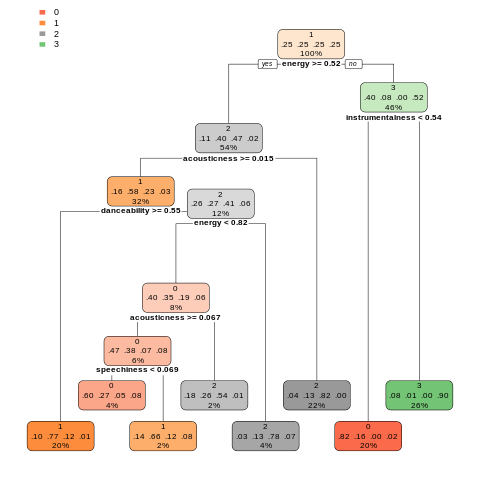

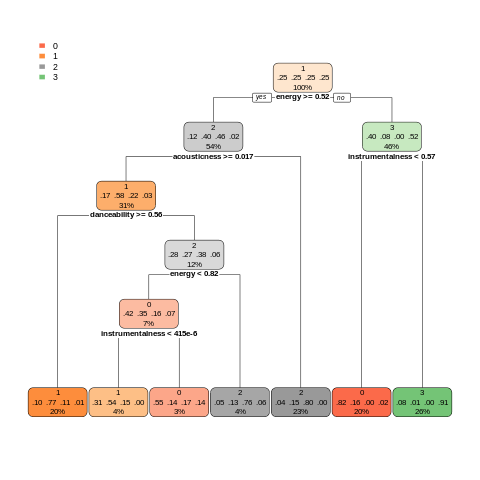

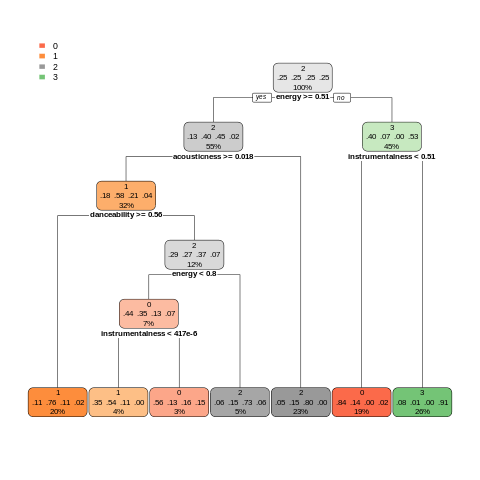

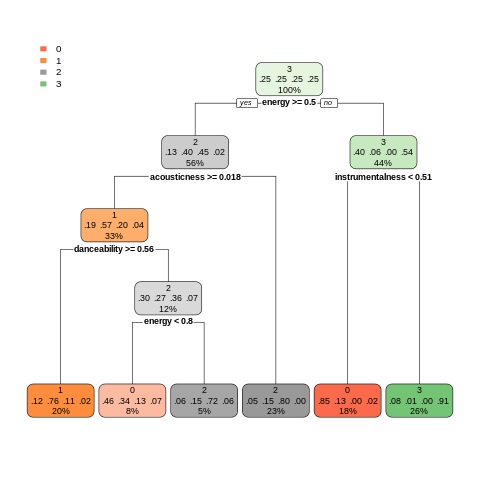

In [ ]:
%%R

library(rpart)
library(rpart.plot)
library(cvms)
library(dplyr)

entrenar_y_evaluar_arbol <- function(porcentaje, minsplit, minbucket = 50, maxdepth = 10) {

  path_entrenamiento <- sprintf("/content/drive/MyDrive/TFM/datos_entrenamiento_%d_por_ciento.csv", porcentaje)
  path_prueba <- sprintf("/content/drive/MyDrive/TFM/datos_test_%d_por_ciento.csv", porcentaje)

  datos_entrenamiento <- read.csv(path_entrenamiento)
  datos_prueba <- read.csv(path_prueba)

  datos_entrenamiento$labels <- as.factor(datos_entrenamiento$labels)
  datos_prueba$labels <- as.factor(datos_prueba$labels)

  # Verificar la estructura de los conjuntos de datos
  str(datos_entrenamiento)
  str(datos_prueba)

  # Entrenar el modelo de árbol de decisión
  tiempo_entrenamiento <- system.time({
    modelo_arbol <- rpart(labels ~ ., data = datos_entrenamiento, method = "class",
                          minsplit = minsplit, minbucket = minbucket, maxdepth = maxdepth)
  })

  print(modelo_arbol)

  tiempo_prediccion <- system.time({
    predicciones <- predict(modelo_arbol, newdata = datos_prueba, type = "class")
  })

  precision <- mean(predicciones == datos_prueba$labels)
  print(precision)

  matriz_confusion <- table(predicciones, datos_prueba$labels)
  print(matriz_confusion)

  # Mostrar el árbol de decisión gráficamente
  rpart.plot(modelo_arbol)

  print(paste("Tiempo de entrenamiento (preparación de datos):", tiempo_entrenamiento["elapsed"], "segundos"))
  print(paste("Tiempo de predicción:", tiempo_prediccion["elapsed"], "segundos"))
}

entrenar_y_evaluar_arbol(20, minsplit = 10)
entrenar_y_evaluar_arbol(50, minsplit = 10)
entrenar_y_evaluar_arbol(70, minsplit = 5)
entrenar_y_evaluar_arbol(100, minsplit = 5)


In [ ]:
%%R
install.packages("randomForest")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpKp7ZAN/downloaded_packages’




Call:
 randomForest(formula = labels ~ ., data = datos_entrenamiento,      mtry = mtry, replace = TRUE, nodesize = min_node_size) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 7.86%
Confusion matrix:
      0     1     2     3 class.error
0 26800  1292   596  1040  0.09849300
1  1394 25883  2190   143  0.12586964
2   288  1820 27454    31  0.07228061
3   446    63    21 29219  0.01781572
[1] 0.9220863
   predicciones_rf
        0     1     2     3
  0 11417   525   257   459
  1   614 11160   946    56
  2   134   718 11931    10
  3   198    40     6 12393
[1] "Tiempo de entrenamiento (preparación de datos): 106.992 segundos"
[1] "Tiempo de predicción: 4.55600000000004 segundos"


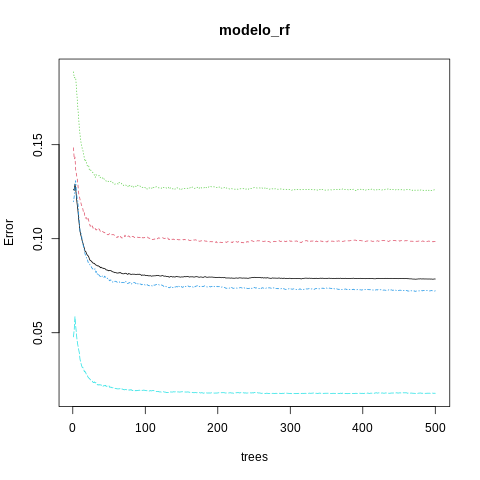

In [ ]:
%%R

library(randomForest)

entrenar_y_evaluar_rf <- function(porcentaje, mtry = 3, min_node_size = 4) {

  path_entrenamiento <- sprintf("/content/drive/MyDrive/TFM/datos_entrenamiento_%d_por_ciento.csv", porcentaje)
  path_prueba <- sprintf("/content/drive/MyDrive/TFM/datos_test_%d_por_ciento.csv", porcentaje)

  datos_entrenamiento <- read.csv(path_entrenamiento)
  datos_prueba <- read.csv(path_prueba)

  datos_entrenamiento$labels <- as.factor(datos_entrenamiento$labels)
  datos_prueba$labels <- as.factor(datos_prueba$labels)

  # Entrenar el modelo de Random Forest
  tiempo_entrenamiento <- system.time({
    modelo_rf <- randomForest(labels ~ ., data = datos_entrenamiento,
                              mtry = mtry,
                              replace = TRUE,
                              nodesize = min_node_size)

  })

  print(modelo_rf)
  plot(modelo_rf)

  save(modelo_rf, file = sprintf("/content/drive/MyDrive/TFM/random_forest_model.RData", porcentaje))

  tiempo_prediccion <- system.time({
    predicciones_rf <- predict(modelo_rf, newdata = datos_prueba)
  })

  precision <- mean(predicciones_rf == datos_prueba$labels)
  print(precision)

  matriz_confusion <- table(datos_prueba$labels, predicciones_rf)
  print(matriz_confusion)

  print(paste("Tiempo de entrenamiento (preparación de datos):", tiempo_entrenamiento["elapsed"], "segundos"))
  print(paste("Tiempo de predicción:", tiempo_prediccion["elapsed"], "segundos"))
}


entrenar_y_evaluar_rf(100, mtry = 2, min_node_size = 20)


In [ ]:
%%R

library(class)

entrenar_y_evaluar_knn <- function(porcentaje, k) {

  path_entrenamiento <- sprintf("/content/drive/MyDrive/TFM/datos_entrenamiento_%d_por_ciento.csv", porcentaje)
  path_prueba <- sprintf("/content/drive/MyDrive/TFM/datos_test_%d_por_ciento.csv", porcentaje)

  datos_entrenamiento <- read.csv(path_entrenamiento)
  datos_prueba <- read.csv(path_prueba)

  tiempo_entrenamiento <- system.time({

    datos_entrenamiento$labels <- as.factor(datos_entrenamiento$labels)
    datos_prueba$labels <- as.factor(datos_prueba$labels)

    # Verificar la estructura de los conjuntos de datos
    str(datos_entrenamiento)
    str(datos_prueba)

    X_train <- datos_entrenamiento[, -ncol(datos_entrenamiento)]
    y_train <- datos_entrenamiento$labels

    X_test <- datos_prueba[, -ncol(datos_prueba)]
    y_test <- datos_prueba$labels

    X_train <- scale(X_train)
    X_test <- scale(X_test, center = attr(X_train, "scaled:center"), scale = attr(X_train, "scaled:scale"))
  })

  tiempo_prediccion <- system.time({

    modelo_knn <- knn(train = X_train,
                      test = X_test,
                      cl = y_train,
                      k = k)
  })

  precision <- mean(modelo_knn == y_test)
  print(precision)

  matriz_confusion <- table(modelo_knn, y_test)
  print(matriz_confusion)

  print(paste("Tiempo de entrenamiento (preparación de datos):", tiempo_entrenamiento["elapsed"], "segundos"))
  print(paste("Tiempo de predicción:", tiempo_prediccion["elapsed"], "segundos"))
}

entrenar_y_evaluar_knn(20, 11)
entrenar_y_evaluar_knn(50, 21)
entrenar_y_evaluar_knn(70, 21)
entrenar_y_evaluar_knn(100, 21)


'data.frame':	23736 obs. of  8 variables:
 $ acousticness    : num  8.07e-02 4.94e-02 3.00e-02 9.73e-01 9.77e-01 1.52e-03 6.72e-02 3.70e-02 4.50e-06 6.18e-01 ...
 $ danceability    : num  0.556 0.609 0.541 0.447 0.178 0.0771 0.592 0.765 0.518 0 ...
 $ energy          : num  0.657 0.644 0.671 0.11 0.347 0.945 0.62 0.768 0.693 0.0721 ...
 $ instrumentalness: num  0.00 6.86e-05 2.42e-03 9.47e-01 8.87e-01 5.84e-01 2.66e-01 3.02e-04 8.91e-01 6.94e-01 ...
 $ loudness        : num  -5.13 -4.88 -7.43 -60 -19.09 ...
 $ speechiness     : num  0.965 0.049 0.0408 0.0356 0.0477 0.111 0.0349 0.106 0.0329 0 ...
 $ valence         : num  0.688 0.564 0.16 0.219 0.288 0.194 0.293 0.445 0.475 0 ...
 $ labels          : Factor w/ 4 levels "0","1","2","3": 2 2 3 4 4 3 1 3 3 4 ...
'data.frame':	10173 obs. of  8 variables:
 $ acousticness    : num  0.714 0.989 0.00441 0.835 0.989 0.612 0.749 0.508 0.00343 0.775 ...
 $ danceability    : num  0.104 0.328 0.194 0.51 0.528 0.803 0.636 0.741 0.694 0.61 ...
 $ ene

In [ ]:
%%R

install.packages("e1071")

(as ‘lib’ is unspecified)














	‘/tmp/RtmpSfP8RY/downloaded_packages’



In [ ]:
%%R

library(e1071)

entrenar_y_evaluar_svm <- function(porcentaje, kernel_) {

  path_entrenamiento <- sprintf("/content/drive/MyDrive/TFM/datos_entrenamiento_%d_por_ciento.csv", porcentaje)
  path_prueba <- sprintf("/content/drive/MyDrive/TFM/datos_test_%d_por_ciento.csv", porcentaje)

  datos_entrenamiento <- read.csv(path_entrenamiento)
  datos_prueba <- read.csv(path_prueba)

  datos_entrenamiento$labels <- as.factor(datos_entrenamiento$labels)
  datos_prueba$labels <- as.factor(datos_prueba$labels)

  X_train <- datos_entrenamiento[, -ncol(datos_entrenamiento)]
  X_test <- datos_prueba[, -ncol(datos_prueba)]

  X_train_scaled <- scale(X_train)
  X_test_scaled <- scale(X_test, center = attr(X_train_scaled, "scaled:center"), scale = attr(X_train_scaled, "scaled:scale"))

  datos_entrenamiento_scaled <- as.data.frame(X_train_scaled)
  datos_prueba_scaled <- as.data.frame(X_test_scaled)
  datos_entrenamiento_scaled$labels <- datos_entrenamiento$labels
  datos_prueba_scaled$labels <- datos_prueba$labels

  tiempo_entrenamiento <- system.time({
    modelo_svm <- svm(labels ~ ., data = datos_entrenamiento_scaled, kernel = kernel_)
  })

  tiempo_prediccion <- system.time({
    predicciones <- predict(modelo_svm, newdata = datos_prueba_scaled)
  })

  precision <- mean(predicciones == datos_prueba$labels)
  print(precision)

  matriz_confusion <- table(datos_prueba$labels, predicciones)
  print(matriz_confusion)

  print(paste("Tiempo de entrenamiento (preparación de datos):", tiempo_entrenamiento["elapsed"], "segundos"))
  print(paste("Tiempo de predicción:", tiempo_prediccion["elapsed"], "segundos"))
}

entrenar_y_evaluar_svm(20, kernel_ = 'radial')
entrenar_y_evaluar_svm(50, kernel_ = 'linear')
entrenar_y_evaluar_svm(70, kernel_ = 'linear')
entrenar_y_evaluar_svm(100, kernel_ = 'radial')


[1] 0.8677873
   predicciones
       0    1    2    3
  0 2067  209   91  137
  1  173 2130  305   17
  2   36  307 2110   10
  3   46   12    2 2521
[1] "Tiempo de entrenamiento (preparación de datos): 17.982 segundos"
[1] "Tiempo de predicción: 2.14100000000008 segundos"
[1] 0.8416169
   predicciones
       0    1    2    3
  0 5037  656  268  394
  1  591 4724  965   47
  2  110  767 5455   18
  3  194   11    7 6188
[1] "Tiempo de entrenamiento (preparación de datos): 115.273 segundos"
[1] "Tiempo de predicción: 13.673 segundos"
[1] 0.8419323
   predicciones
       0    1    2    3
  0 7177  892  372  548
  1  874 6614 1357   54
  2  113 1128 7575   21
  3  234   15   20 8611
[1] "Tiempo de entrenamiento (preparación de datos): 232.684 segundos"
[1] "Tiempo de predicción: 27.3690000000001 segundos"
[1] 0.8779884
   predicciones
        0     1     2     3
  0 10658   976   386   638
  1   880 10368  1444    84
  2   163  1311 11301    18
  3   236    59    11 12331
[1] "Tiempo de e

In [ ]:
%%R

library(e1071)

entrenar_y_evaluar_nb <- function(porcentaje) {

  path_entrenamiento <- sprintf("/content/drive/MyDrive/TFM/datos_entrenamiento_%d_por_ciento.csv", porcentaje)
  path_prueba <- sprintf("/content/drive/MyDrive/TFM/datos_test_%d_por_ciento.csv", porcentaje)

  datos_entrenamiento <- read.csv(path_entrenamiento)
  datos_prueba <- read.csv(path_prueba)

  datos_entrenamiento$labels <- as.factor(datos_entrenamiento$labels)
  datos_prueba$labels <- as.factor(datos_prueba$labels)

  tiempo_entrenamiento <- system.time({
    modelo_nb <- naiveBayes(labels ~ ., data = datos_entrenamiento)
  })

  tiempo_prediccion <- system.time({
    predicciones <- predict(modelo_nb, newdata = datos_prueba)
  })

  precision <- mean(predicciones == datos_prueba$labels)
  print(precision)

  matriz_confusion <- table(datos_prueba$labels, predicciones)
  print(matriz_confusion)

  print(paste("Tiempo de entrenamiento (preparación de datos):", tiempo_entrenamiento["elapsed"], "segundos"))
  print(paste("Tiempo de predicción:", tiempo_prediccion["elapsed"], "segundos"))
}

# Ejemplo de uso
entrenar_y_evaluar_nb(20)
entrenar_y_evaluar_nb(50)
entrenar_y_evaluar_nb(70)
entrenar_y_evaluar_nb(100)


[1] 0.8091025
   predicciones
       0    1    2    3
  0 1866  371  153  114
  1  175 1859  587    4
  2   32  279 2146    6
  3  183   37    1 2360
[1] "Tiempo de entrenamiento (preparación de datos): 0.0219999999999345 segundos"
[1] "Tiempo de predicción: 1.61400000000003 segundos"
[1] 0.8099245
   predicciones
       0    1    2    3
  0 4629  974  417  335
  1  420 4437 1456   14
  2   71  595 5670   14
  3  469   68    1 5862
[1] "Tiempo de entrenamiento (preparación de datos): 0.0529999999998836 segundos"
[1] "Tiempo de predicción: 3.81500000000005 segundos"
[1] 0.8118523
   predicciones
       0    1    2    3
  0 6640 1343  557  449
  1  655 6228 2005   11
  2   87  876 7863   11
  3  596  107    2 8175
[1] "Tiempo de entrenamiento (preparación de datos): 0.0760000000000218 segundos"
[1] "Tiempo de predicción: 7.28899999999999 segundos"
[1] 0.8096493
   predicciones
        0     1     2     3
  0  9331  1897   777   653
  1   938  8955  2863    20
  2   134  1301 11332    26


# NUEVO CONJUNTO

In [ ]:
ruta_archivo = '/content/drive/MyDrive/TFM/new_test.csv'
new_test = pd.read_csv(ruta_archivo)

In [ ]:
# Cargar el modelo guardado
loaded_model = load_model('/content/drive/MyDrive/TFM/final_rf_model_pycaret')

# Hacer predicciones en un nuevo conjunto de datos
new_predictions_rf = predict_model(loaded_model, data=new_test.iloc[:, :-1])

new_accuracy_rf = accuracy_score(new_test['labels'], new_predictions_rf['prediction_label'])
print(f'New Accuracy: {new_accuracy_rf}')


Transformation Pipeline and Model Successfully Loaded
New Accuracy: 0.5454545454545454


In [ ]:
new_predictions_rf

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,valence,prediction_label,prediction_score
0,0.07780,0.532,0.8870,0.000206,-3.757,0.0335,0.794,2,0.79
1,0.21900,0.647,0.8220,0.000000,-4.662,0.1830,0.962,1,0.98
2,0.02990,0.589,0.9100,0.000000,-3.680,0.2110,0.890,2,0.89
3,0.01800,0.573,0.9020,0.001250,-7.638,0.0540,0.876,1,0.91
4,0.04260,0.723,0.7770,0.000004,-3.503,0.1080,0.961,1,0.98
5,0.06270,0.568,0.7480,0.000002,-6.538,0.0299,0.647,1,1.00
6,0.06150,0.645,0.6460,0.000030,-8.334,0.0427,0.295,1,0.95
7,0.08630,0.745,0.9620,0.000077,-5.322,0.0416,0.699,1,0.93
8,0.09610,0.611,0.6740,0.000000,-6.143,0.0279,0.261,1,0.88
9,0.61500,0.467,0.3240,0.024800,-10.451,0.0255,0.166,0,1.00


In [ ]:
%%R

library(randomForest)

cargar_y_predecir_rf <- function(porcentaje) {
  # Cargar el modelo guardado
  load(sprintf("/content/drive/MyDrive/TFM/random_forest_model.RData", porcentaje))
  path_prueba <- sprintf("/content/drive/MyDrive/TFM/new_test.csv", porcentaje)

  datos_prueba <- read.csv(path_prueba)

  datos_prueba$labels <- as.factor(datos_prueba$labels)

  predicciones_rf <- predict(modelo_rf, newdata = datos_prueba)

  precision <- mean(predicciones_rf == datos_prueba$labels)
  print(precision)

  matriz_confusion <- table(datos_prueba$labels, predicciones_rf)
  print(matriz_confusion)
}

cargar_y_predecir_rf(100)


[1] 0.5454545
   predicciones_rf
    0 1 2 3
  0 6 3 0 0
  1 0 5 2 0
  2 0 3 1 0
  3 1 1 0 0
